# Texture clustering

In [1]:
import random

import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_path = 'samples/foxes/1.jpg'
image = cv2.imread(image_path)

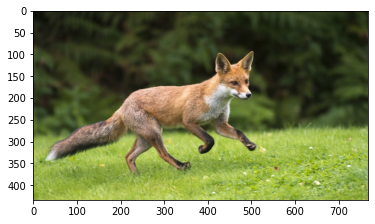

In [3]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [4]:
rgb_image.shape

(434, 768, 3)

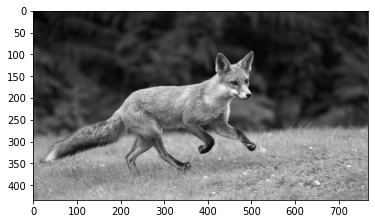

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

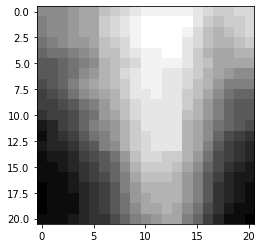

In [6]:
row = 100
column = 100
r = 10
window = gray[row-r:column+r+1, row-r:column+r+1]
plt.imshow(window, cmap='gray')

In [7]:
window.shape

(21, 21)

In [8]:
window.flatten().shape

(441,)

## K-means clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
n_rows, n_columns = gray.shape[:2]
n_samples = 50000
radius = 10
centers = np.zeros((n_samples, 2), dtype=int)
X = np.zeros((n_samples, (2*radius + 1)**2))
for i in range(n_samples):
    row = random.randint(radius, n_rows - radius - 1)
    column = random.randint(radius, n_columns - radius - 1)
    # row = random.randint(100, 500)
    # column = random.randint(600, 800)
    centers[i, 0] = row
    centers[i, 1] = column
    window = gray[row-radius:row+radius+1, column-radius:column+radius+1]
    X[i, :] = window.flatten()

In [11]:
k_means = KMeans(n_clusters=5)

In [12]:
labels = k_means.fit_predict(X)

In [13]:
colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255),
    (0, 255, 255)
]

In [14]:
labels

array([1, 2, 2, ..., 2, 0, 2], dtype=int32)

In [15]:
result = np.zeros((n_rows, n_columns, 3), dtype=int)
for i in range(n_samples):
    result[centers[i, 0], centers[i, 1], :] = colors[labels[i]]

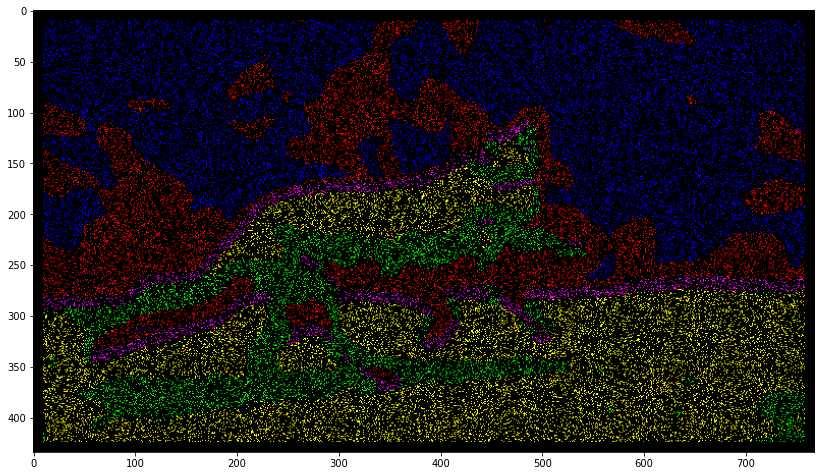

In [16]:
plt.figure(figsize=(14, 10))
plt.imshow(result)
plt.show()

$\rhd$ Create mask for the fox!

$\rhd$ Check foreground and background histograms!

## Edge detection

In [17]:
sobel_x = cv2.Sobel(src=gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobel_y = cv2.Sobel(src=gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobel_xy = cv2.Sobel(src=gray, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

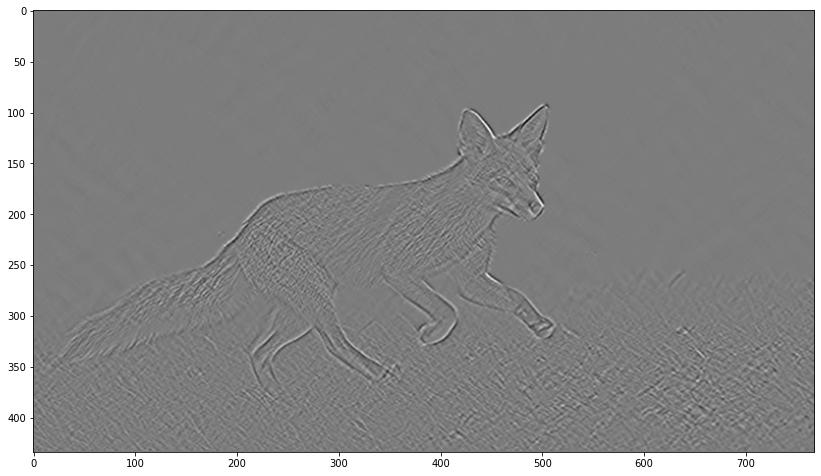

In [18]:
plt.figure(figsize=(14, 10))
plt.imshow(sobel_xy, cmap='gray')
plt.show()

In [19]:
canny = cv2.Canny(gray, threshold1=100, threshold2=200)

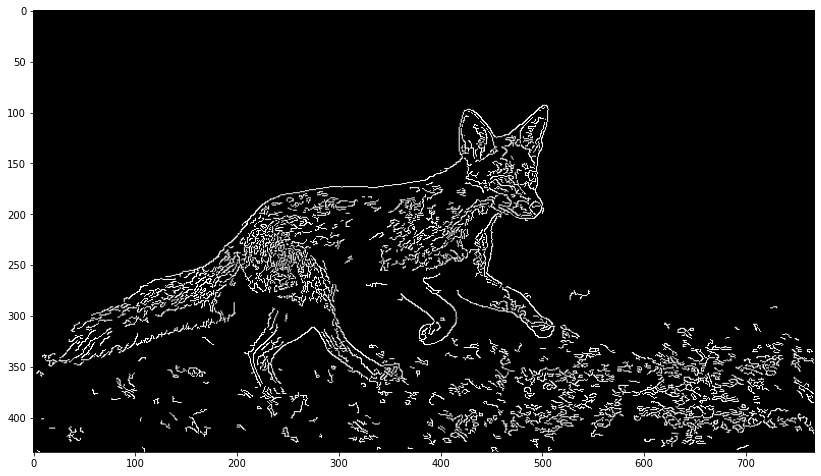

In [20]:
plt.figure(figsize=(14, 10))
plt.imshow(canny, cmap='gray')
plt.show()